In [55]:
library(tidyverse)
library(stringr)

In [56]:
baseline <- read_tsv("data/protein_control1.tsv")
treatment10000 <- read_tsv("data/protein8hpi.tsv")

Rows: 3048 Columns: 22
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (9): Protein, Protein ID, Entry Name, Gene, Organism, Protein Descripti...
dbl (12): Length, Protein Probability, Top Peptide Probability, Total Peptid...
lgl  (1): Razor Observed Modifications

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3240 Columns: 22
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (9): Protein, Protein ID, Entry Name, Gene, Organism, Protein Descripti...
dbl (12): Length, Protein Probability, Top Peptide Probability, Total Peptid...
lgl  (1): Razor Observed Modifications

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FA

In [60]:
head(treatment10000)

Protein,Protein ID,Entry Name,Gene,Length,Organism,Protein Description,Protein Existence,Protein Probability,Top Peptide Probability,⋯,Razor Peptides,Total Spectral Count,Unique Spectral Count,Razor Spectral Count,Total Intensity,Unique Intensity,Razor Intensity,Razor Assigned Modifications,Razor Observed Modifications,Indistinguishable Proteins
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>
AAA42931.1,"AAA42931.1 polyprotein (Genbank M33854.1, PUBMED2157045) [Coxsackievirus B3 Kandolf]","AAA42931.1 polyprotein (Genbank M33854.1, PUBMED2157045) [Coxsackievirus B3 Kandolf]",NA,2185,NA,polyprotein,NA,1,0.999,⋯,81,144,144,144,0,0,0,"10C(57.0214), 11C(57.0214), 12C(57.0214), 13C(57.0214), 15M(15.9949), 16C(57.0214), 18C(57.0214), 1C(57.0214), 20M(15.9949), 2C(57.0214), 35M(15.9949), 3C(57.0214), 3M(15.9949), 4C(57.0214), 5C(57.0214), 6C(57.0214), 7C(57.0214), 8C(57.0214), 8M(15.9949), 9C(57.0214)",NA,NA
sp|A0A0B4J2A2|PAL4C_HUMAN,A0A0B4J2A2,PAL4C_HUMAN,PPIAL4C,164,Homo sapiens OX=9606,Peptidyl-prolyl cis-trans isomerase A-like 4C,2:Experimental evidence at transcript level,1,0.999,⋯,1,5,0,5,0,0,0,"24C(57.0214), 9M(15.9949)",NA,NA
sp|A0A0B4J2D5|GAL3B_HUMAN,A0A0B4J2D5,GAL3B_HUMAN,GATD3B,268,Homo sapiens OX=9606,"Glutamine amidotransferase-like class 1 domain-containing protein 3B, mitochondrial",1:Experimental evidence at protein level,1,0.999,⋯,5,5,0,5,0,0,0,12C(57.0214),NA,"sp|P0DPI2|GAL3A_HUMAN, tr|A0A096LPI6|A0A096LPI6_HUMAN"
sp|A0AV96-2|RBM47_HUMAN,A0AV96-2,RBM47_HUMAN,RBM47,524,Homo sapiens OX=9606,Isoform 2 of RNA-binding protein 47,NA,1,0.999,⋯,7,8,0,8,0,0,0,"11C(57.0214), 2C(57.0214), 5C(57.0214), 6C(57.0214)",NA,"sp|A0AV96|RBM47_HUMAN, tr|D6R9D6|D6R9D6_HUMAN, tr|D6RBS9|D6RBS9_HUMAN, tr|D6REZ6|D6REZ6_HUMAN"
sp|A0AVT1|UBA6_HUMAN,A0AVT1,UBA6_HUMAN,UBA6,1052,Homo sapiens OX=9606,Ubiquitin-like modifier-activating enzyme 6,1:Experimental evidence at protein level,1,0.999,⋯,4,5,0,5,0,0,0,5C(57.0214),NA,NA
sp|A0MZ66-3|SHOT1_HUMAN,A0MZ66-3,SHOT1_HUMAN,SHTN1,649,Homo sapiens OX=9606,Isoform 3 of Shootin-1,NA,1,0.999,⋯,12,14,0,14,0,0,0,NA,NA,"sp|A0MZ66-5|SHOT1_HUMAN, sp|A0MZ66-6|SHOT1_HUMAN, sp|A0MZ66|SHOT1_HUMAN"


In [73]:
## Remove proteins that start with contam_sp, and select columns
baseline_clean <- baseline |> filter(!str_detect(Protein, "^contam")) |> 
                                filter(`Protein Description` != "polyprotein") |> 
                                    select(Protein, "Protein ID", "Total Spectral Count")

head(baseline_clean)
print(paste("There are", nrow(baseline_clean), "rows in baseline data"))

Protein,Protein ID,Total Spectral Count
<chr>,<chr>,<dbl>
sp|A0A0B4J2A2|PAL4C_HUMAN,A0A0B4J2A2,5
sp|A0A0B4J2D5|GAL3B_HUMAN,A0A0B4J2D5,6
sp|A0AV96|RBM47_HUMAN,A0AV96,6
sp|A0MZ66|SHOT1_HUMAN,A0MZ66,14
sp|A5A3E0|POTEF_HUMAN,A5A3E0,2
sp|A5YKK6|CNOT1_HUMAN,A5YKK6,6


[1] "There are 3042 rows in baseline data"


In [74]:
treatment10000_clean <- treatment10000 |> filter(!str_detect(Protein, "^contam")) |> 
                                            filter(`Protein Description` != "polyprotein") |> 
                                                select(Protein, "Protein ID", "Total Spectral Count")

head(treatment10000_clean)
print(paste("There are", nrow(treatment10000_clean), "rows in treatment data"))

Protein,Protein ID,Total Spectral Count
<chr>,<chr>,<dbl>
sp|A0A0B4J2A2|PAL4C_HUMAN,A0A0B4J2A2,5
sp|A0A0B4J2D5|GAL3B_HUMAN,A0A0B4J2D5,5
sp|A0AV96-2|RBM47_HUMAN,A0AV96-2,8
sp|A0AVT1|UBA6_HUMAN,A0AVT1,5
sp|A0MZ66-3|SHOT1_HUMAN,A0MZ66-3,14
sp|A5YKK6|CNOT1_HUMAN,A5YKK6,7


[1] "There are 3239 rows in treatment data"


In [75]:
combined <- full_join(baseline_clean, treatment10000_clean, by= c("Protein", "Protein ID")) |> 
                rename("Baseline" = "Total Spectral Count.x", "Treatment_10000" = "Total Spectral Count.y")
combined[is.na(combined)] <- 0
combined <- combined |> mutate(
        Difference = Treatment_10000 - Baseline
    ) |> arrange(desc(abs(Difference)))

In [76]:
combined

Protein,Protein ID,Baseline,Treatment_10000,Difference
<chr>,<chr>,<dbl>,<dbl>,<dbl>
sp|P21333|FLNA_HUMAN,P21333,184,0,-184
sp|P68032|ACTC_HUMAN,P68032,17,201,184
sp|P21333-2|FLNA_HUMAN,P21333-2,0,183,183
sp|P07355-2|ANXA2_HUMAN,P07355-2,0,175,175
sp|P07355|ANXA2_HUMAN,P07355,172,0,-172
sp|Q15149-4|PLEC_HUMAN,Q15149-4,0,160,160
sp|P60709|ACTB_HUMAN,P60709,296,149,-147
sp|O75369-8|FLNB_HUMAN,O75369-8,0,133,133
sp|O75369|FLNB_HUMAN,O75369,130,0,-130


In [80]:
p <- ggplot(combined[1:100,], aes(x = Protein, y = Difference)) + geom_point()

In [102]:
p <- p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +theme(aspect.ratio=2/5) #Long and skinny

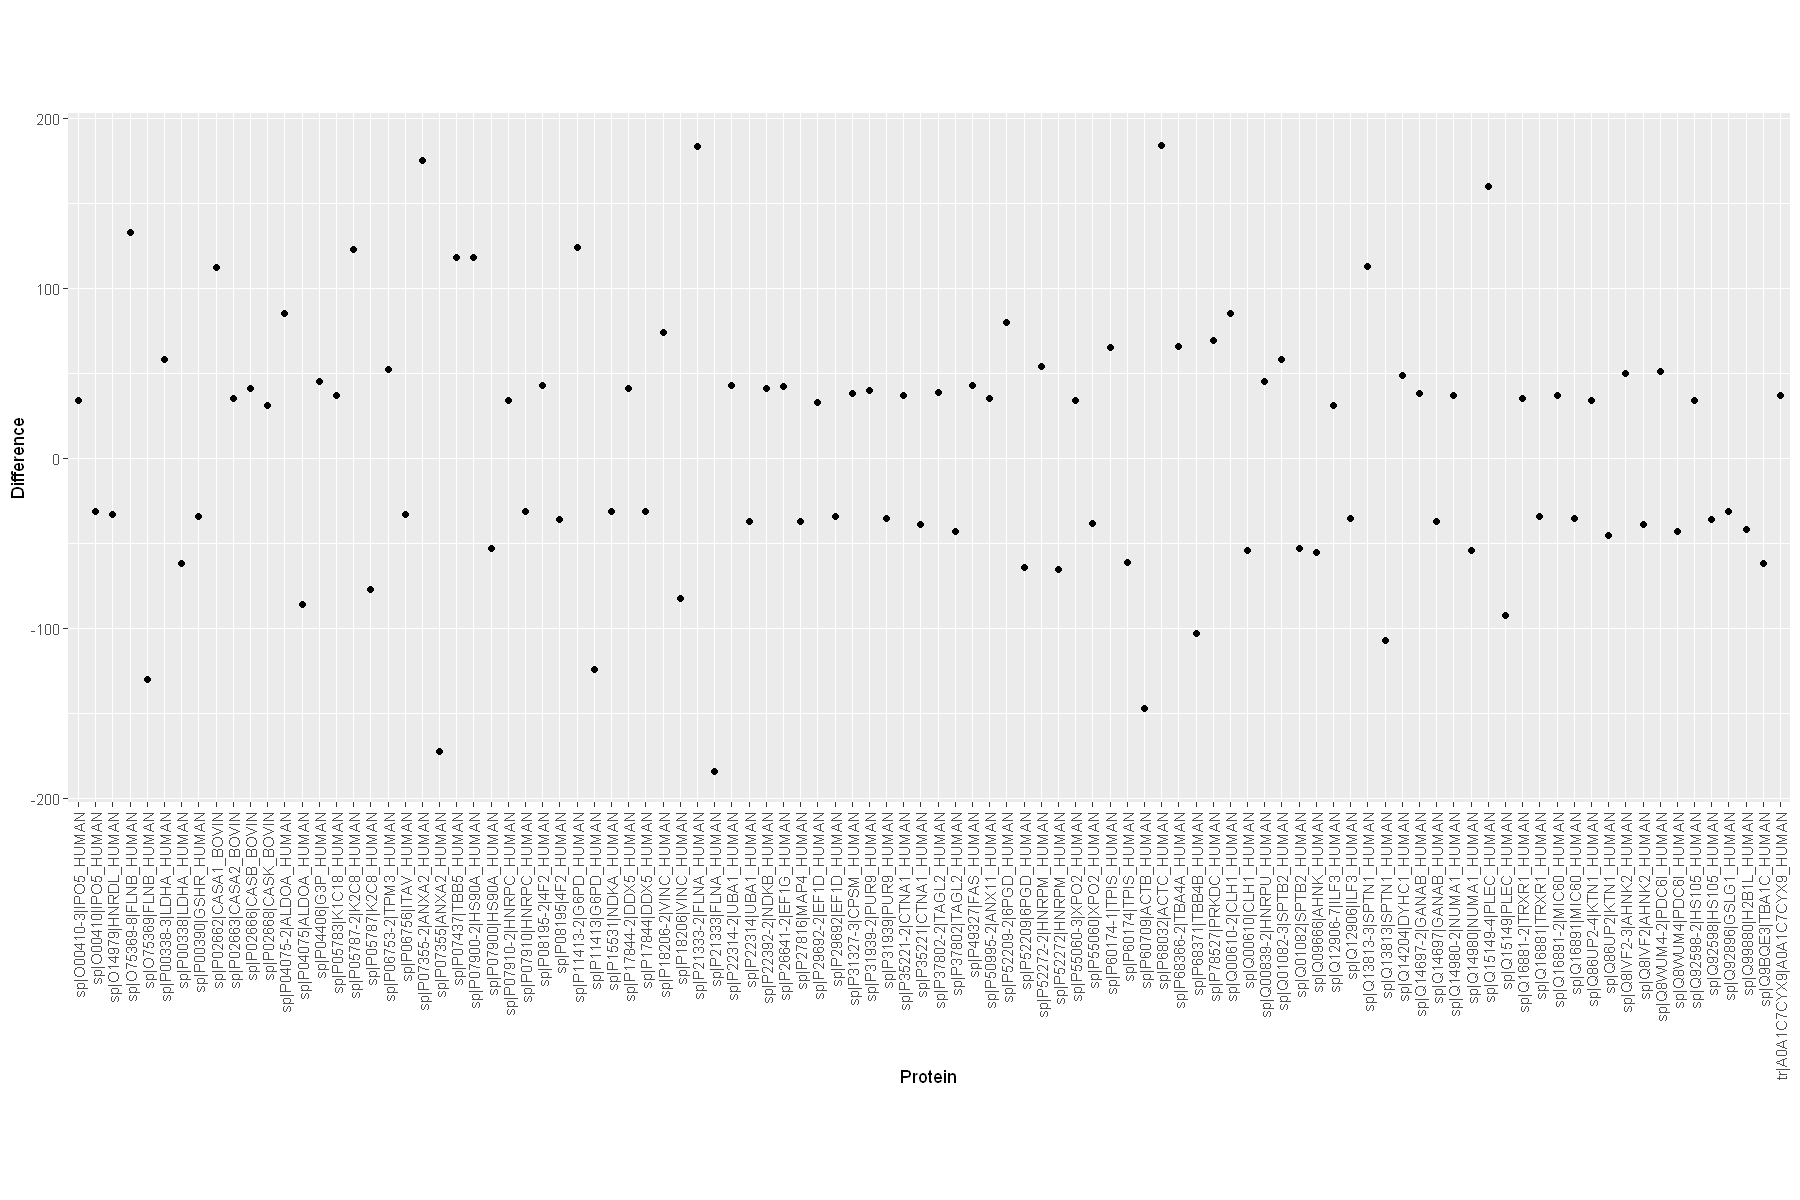

In [103]:
options(repr.plot.width=15, repr.plot.height=10)
p

In [ ]:
write_csv(combined, "output/